In [17]:
pip install pytrends

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
trends = TrendReq()

In [19]:
from pytrends.request import TrendReq
from pytrends.exceptions import TooManyRequestsError, ResponseError
import time

trends = TrendReq(hl='en-US', tz=360, timeout=(10, 25))  

trends.build_payload(kw_list=["Machine Learning"])

def get_interest_by_region(trends):
    try:
        data = trends.interest_by_region()
        return data
    except TooManyRequestsError:
        print("Rate limit exceeded. Retrying after a delay.")
        time.sleep(60) 
        return get_interest_by_region(trends)
    except ResponseError as e:
        print(f"Response error: {e}. Retrying after a delay.")
        time.sleep(60)  
        return get_interest_by_region(trends)

data = get_interest_by_region(trends)
data = data.sort_values(by="Machine Learning", ascending=False)
print(data)

Rate limit exceeded. Retrying after a delay.
Rate limit exceeded. Retrying after a delay.
                          Machine Learning
geoName                                   
China                                  100
Singapore                               55
Ethiopia                                52
India                                   43
Tunisia                                 32
...                                    ...
Haiti                                    0
Heard & McDonald Islands                 0
Honduras                                 0
Iceland                                  0
Åland Islands                            0

[250 rows x 1 columns]


In [20]:
data = data.head(10)
data

,Machine Learning
geoName,
China,100
Singapore,55
Ethiopia,52
India,43
Tunisia,32
Hong Kong,30
Pakistan,29
South Korea,29
Sri Lanka,28


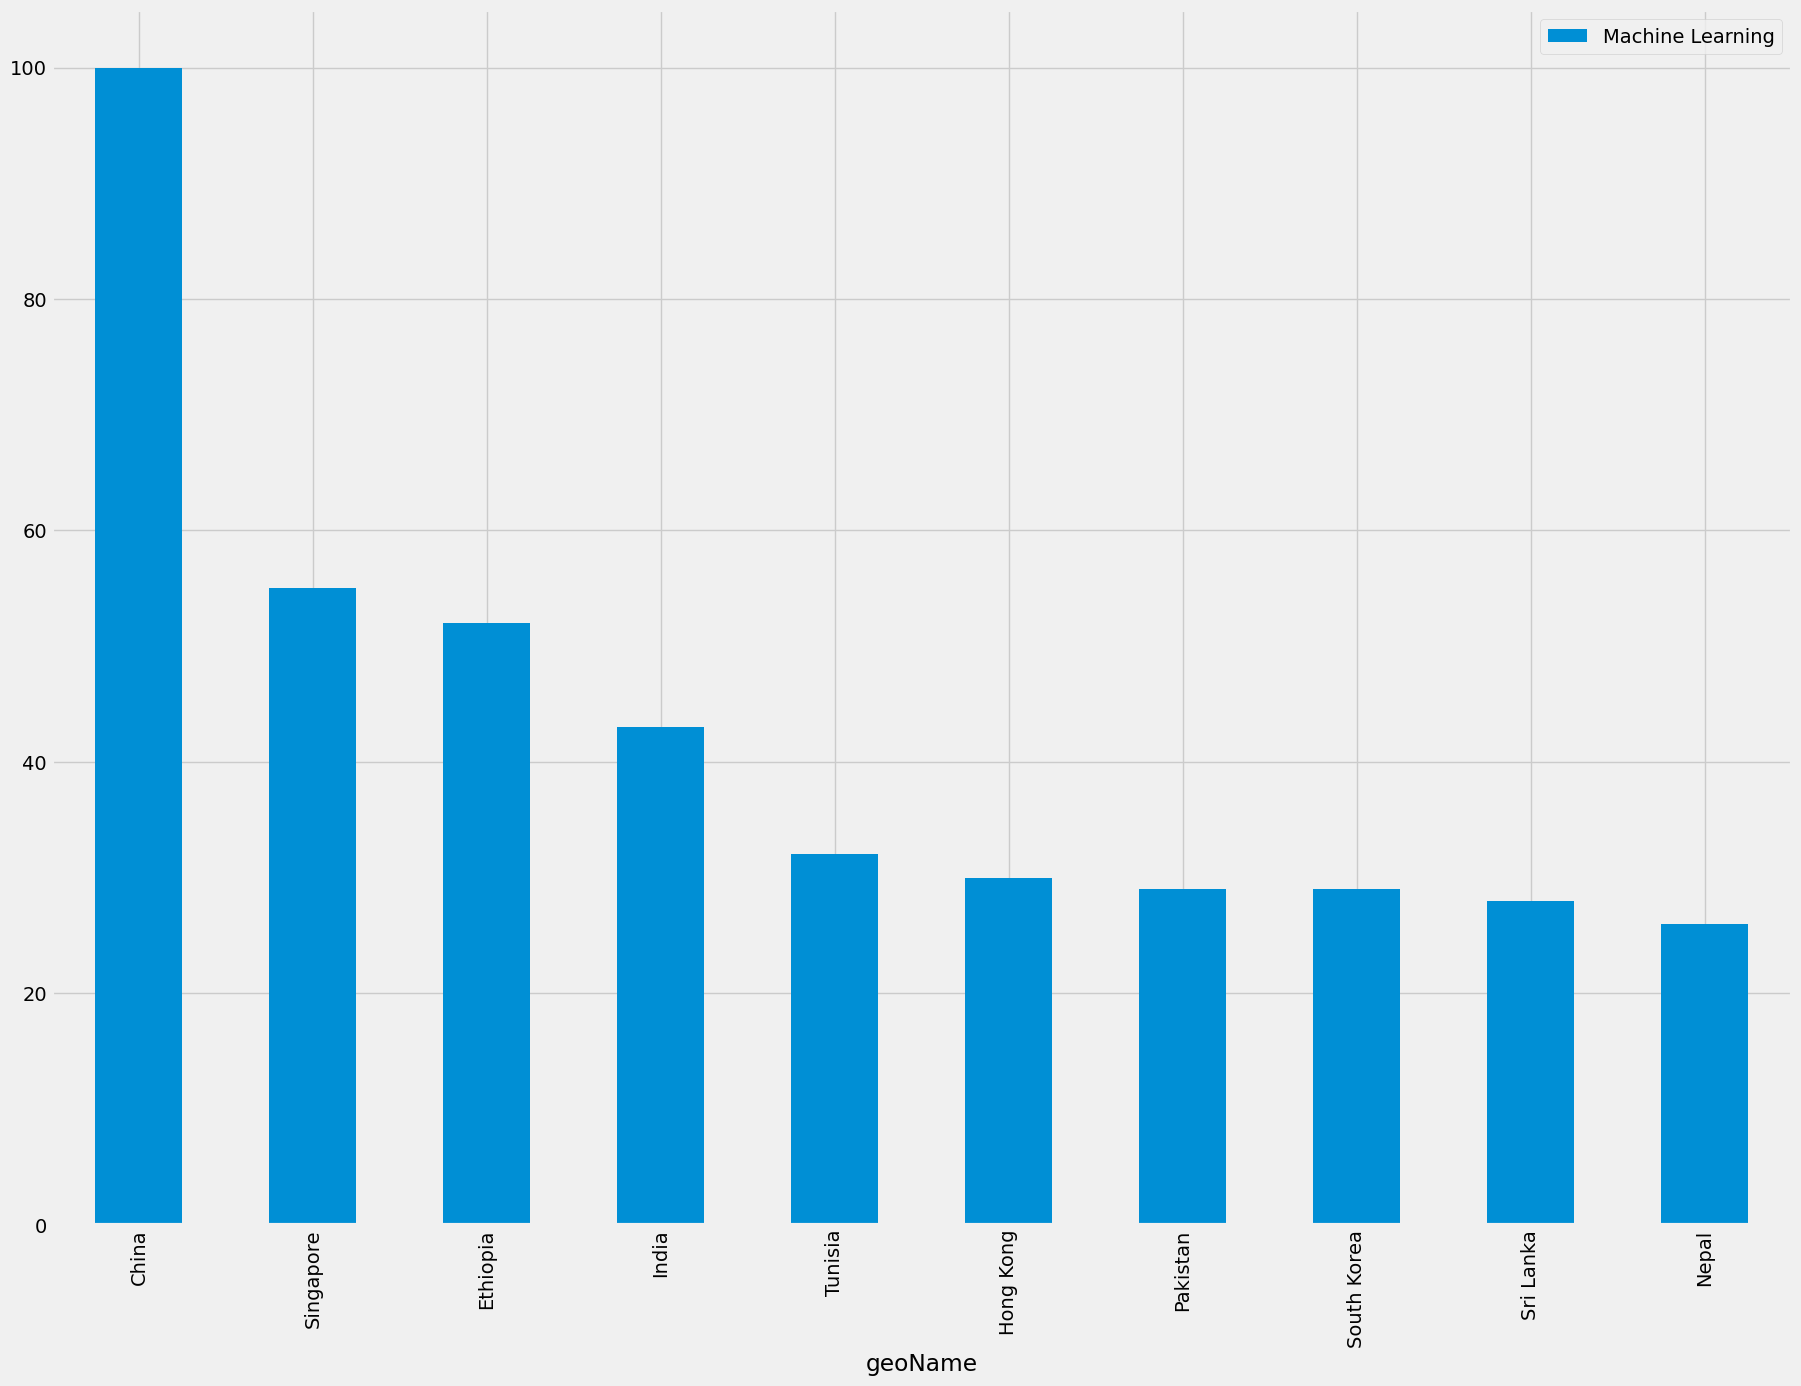

In [21]:
plt.style.use('fivethirtyeight')
data.reset_index().plot(x="geoName", y="Machine Learning", 
                         kind="bar" , figsize = (20,15))
plt.show()

In [22]:
data = TrendReq(hl='en-US', tz=360)
data.build_payload(kw_list=['Machine Learning'])
data = data.interest_over_time()

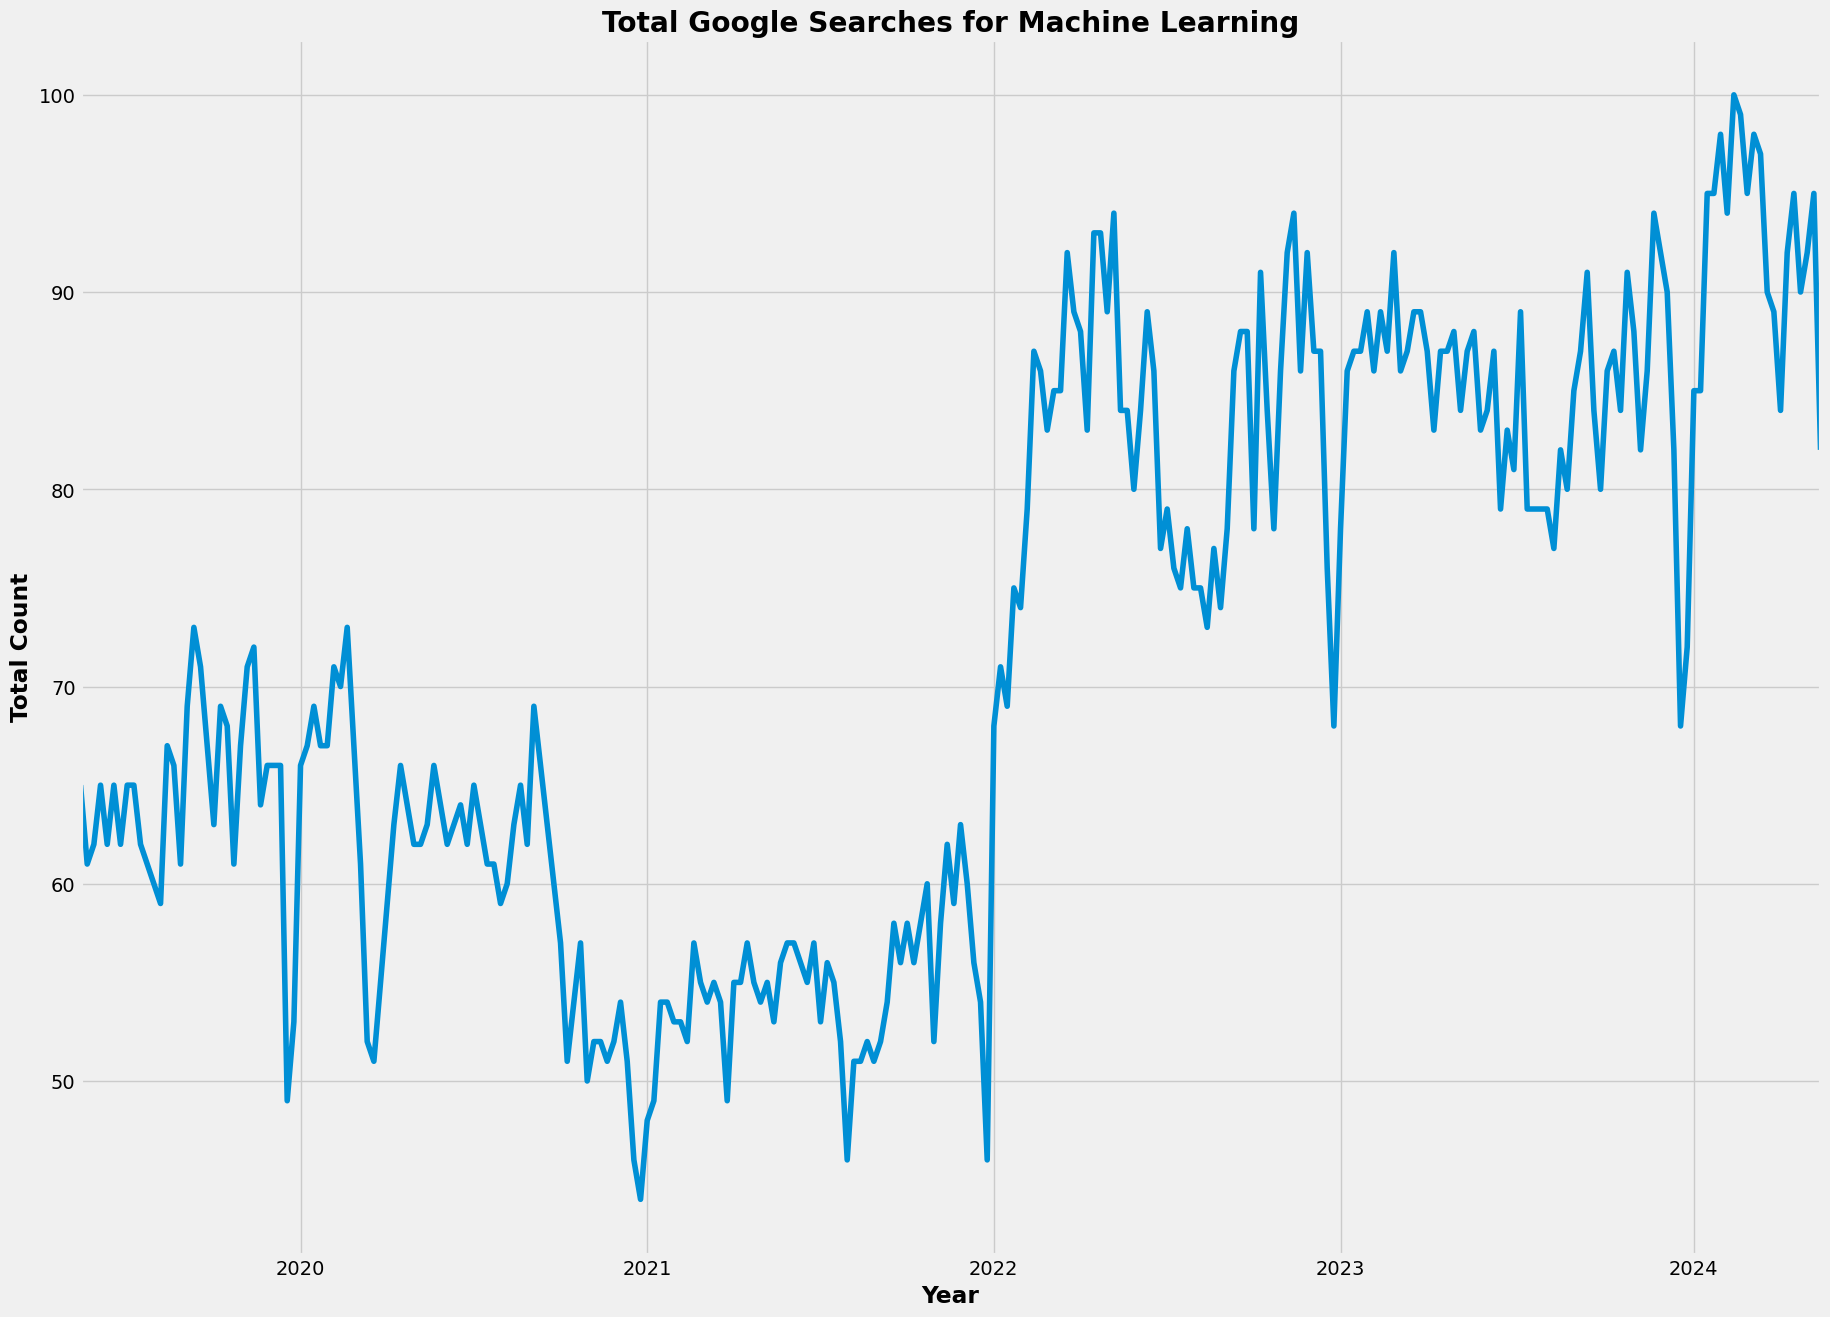

In [23]:
fig, ax = plt.subplots(figsize=(20, 15))
data['Machine Learning'].plot()
plt.style.use('fivethirtyeight')
plt.title('Total Google Searches for Machine Learning', fontweight='bold')
plt.xlabel('Year' ,  fontweight='bold')
plt.ylabel('Total Count' , fontweight='bold')
plt.show()

In [24]:
data = TrendReq(hl='en-US', tz=360)
data.build_payload(kw_list=['Machine Learning'])
data = data.related_queries()

In [25]:
data['Machine Learning']['top'].head(10)

,query,value
0,what is machine learning,100
1,machine learning python,94
2,python,93
3,ai,78
4,ai machine learning,76
5,machine learning model,61
6,deep learning,57
7,google machine learning,54
8,artificial intelligence,43
9,regression,41


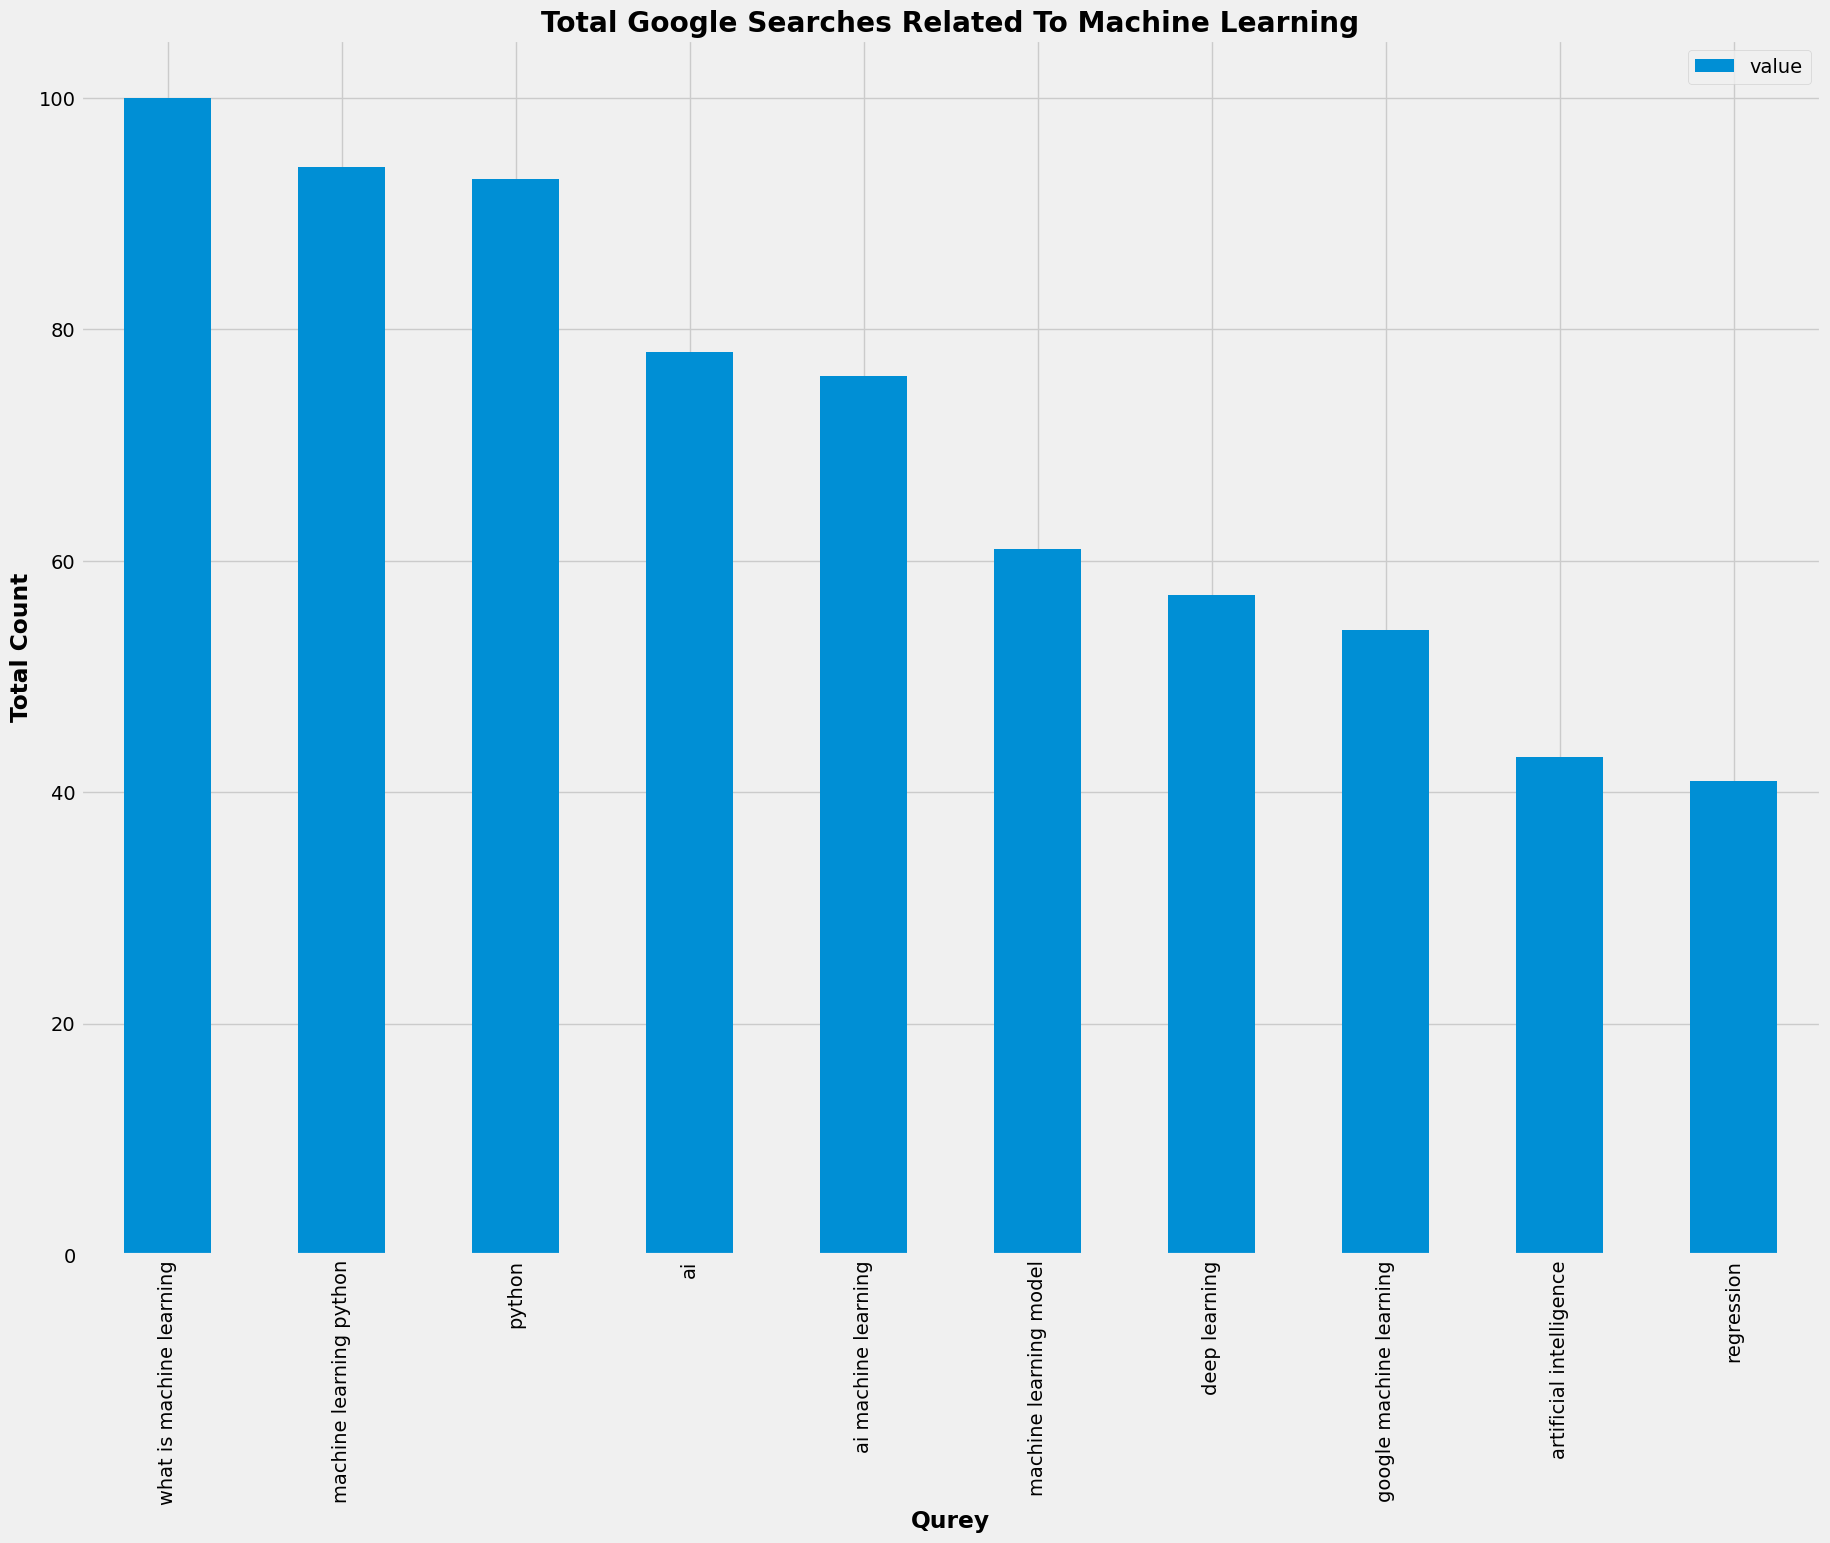

In [26]:
data['Machine Learning']['top'].head(10).plot(x="query", y="value", 
                         kind="bar" , figsize=(20, 15))
plt.style.use('fivethirtyeight')
plt.title('Total Google Searches Related To Machine Learning', fontweight='bold')
plt.xlabel('Qurey' , fontweight='bold')
plt.ylabel('Total Count' , fontweight='bold')
plt.show()